
#Evaluation BEFORE and AFTER building a Machine Learning model##

This basic Notebook explores methods for evaluation BEFORE and AFTER building a model. Evaluation of data and evaluation of model performance are key to any successful Machine Learning implementation so hope you find these tips helpful. This notebook was authored by Diego Schapira.

In [3]:
# First of all let's import basic libraries and data to get started
import numpy as np
from numpy  import array
import pandas as pd
import matplotlib.pyplot as plt

iris = pd.read_csv("data/iris-species/iris.csv") # load data
iris.drop('Id',axis=1,inplace=True) # Id column is redundant as df already assigns index

In [4]:
# DATA EXPLORATION...

# Before starting pre-processing, basic descriptive statistics can help identify if 
# scaling/normalization of data is needed, or how variance varies between 
# features which is useful information for feature selection or at least understanding which 
# features might be most important for classification

# dataframe.info gives basic information on data integrity (data types and detection of NaN values)
iris.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
# Next I'm using dataframe.describe function. Works for both object and numeric
iris.describe()

# Means are in the same order of magnitude for all features so scaling might not be beneficial.
# If mean values were of different orders of magnitude, scaling could significantly 
# improve accuracy of a classifier.

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


X_scaled type is <class 'numpy.ndarray'>


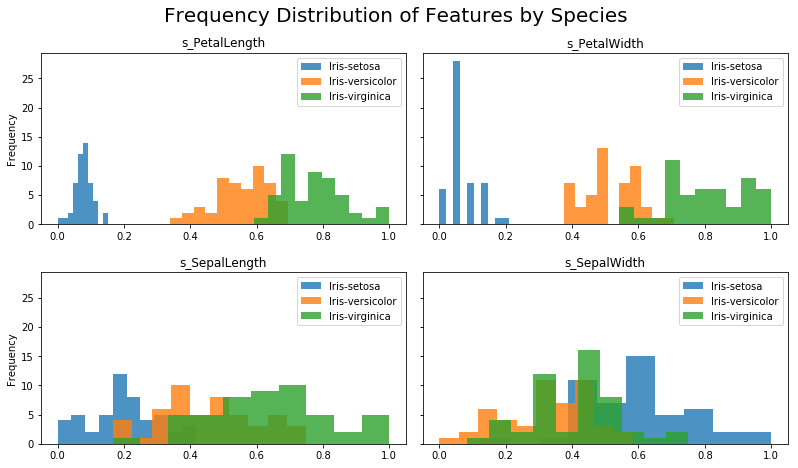

,s_SepalLength,s_SepalWidth,s_PetalLength,s_PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [6]:
# Although not essential for this dataset let's see if scaling provides additional insights.

# First we need to split X, Y into separate sets to feed X to the scaler.
X = iris.drop('Species',1)
Y = iris.Species

# Scaling of X
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print('X_scaled type is',type(X_scaled))

# As output of scaler is np array I'll transform back to df for easier exploration and plotting
X_scaled_df = pd.DataFrame(X_scaled,columns=['s_SepalLength','s_SepalWidth',
                                             's_PetalLength','s_PetalWidth'])
df = pd.concat([X_scaled_df,Y],axis=1)

# Notice x-axis on subplots are all the same for all features (0 to 1) after scaling.
fig = plt.figure(figsize=(12,7))
fig.suptitle('Frequency Distribution of Features by Species ',fontsize=20)

ax1 = fig.add_subplot(221)
df.groupby("Species").s_PetalLength.plot(kind='hist',alpha=0.8,legend=True,title='s_PetalLength')
ax2 = fig.add_subplot(222,sharey=ax1)
df.groupby("Species").s_PetalWidth.plot(kind='hist',alpha=0.8,legend=True,title='s_PetalWidth')
ax3 = fig.add_subplot(223,sharey=ax1)
df.groupby("Species").s_SepalLength.plot(kind='hist',alpha=0.8,legend=True,title='s_SepalLength')
ax4 = fig.add_subplot(224,sharey=ax1)
df.groupby("Species").s_SepalWidth.plot(kind='hist',alpha=0.8,legend=True,title='s_SepalWidth')

plt.tight_layout(pad=4, w_pad=1, h_pad=1.5)
plt.show()
X_scaled_df.describe()

/Users/pantelis/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


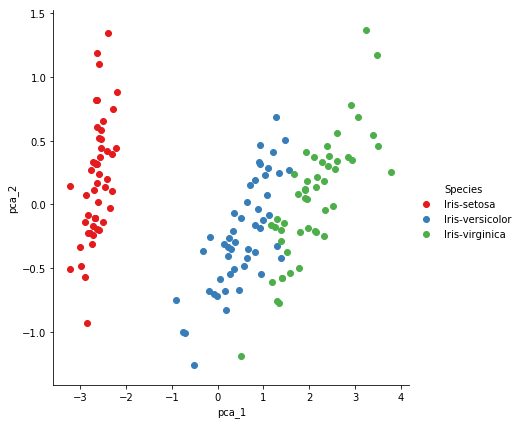

In [8]:
# Another useful visualization I like to use during exploration is a 2D PCA plot.
# It can quickly indicate how easy or difficult the classification problem is.
# This is particularly relevant for high-dimensional datasets.

from sklearn.decomposition import PCA
# spliting input and target
X = iris.drop('Species',1)
Y = iris.Species

pca = PCA(n_components=2).fit_transform(X) # pca output is an array
pca_df = pd.DataFrame(pca,columns=['pca_1','pca_2']) # transforming back to df
pca_Y = pd.concat([pca_df, Y],axis=1)

# The 3 species cluster nicely which is a good indication a classifier can be trained 
# at high accuracy. 
# It is also expected that accuracy of identifying setosa will be higher.

import matplotlib.pyplot as plt
import seaborn as sns
sns.FacetGrid(pca_Y, hue="Species", palette="Set1", size=6).map(plt.scatter, "pca_1", "pca_2").add_legend()
plt.show()

In [10]:
# Let's now build a classifier and evaluate accuracy
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 0)
print("train sample size",x_train.shape,type(x_train))
print("test sample size",x_test.shape,type(x_test))

train sample size (105, 4) <class 'pandas.core.frame.DataFrame'>
test sample size (45, 4) <class 'pandas.core.frame.DataFrame'>


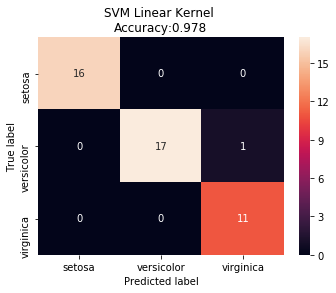

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

clf = SVC(kernel = 'linear').fit(x_train,y_train)
clf.predict(x_train)
y_pred = clf.predict(x_test)

# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



In this example the model overall accuracy on the test set was 0.978 (Accurate predictions/All or True Positives/All).
 
However, the confusion matrix gives additional insight into accuracy by class and intuition for precision and recall efficiency.
 
An insight we can get from the matrix is that the model was very accurate at classifying setosa and versicolor (True Positive/All = 1.0). However, accuracy for virginica was lower (11/12 = 0.917).

If for any reason, successful classification of virginica was particularly desired to the use case (e.g. it's a poisonous plant), then the confusion matrix will help highlight differences between the classes. 

sklearn.metrics module has many functions that calculate evaluation scores like precision and recall. In this example I wanted to show the intuition for Machine Learning model evaluation beyond a simple assessment of overall test/pred accuracy.